In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
# np.sum does column wise thing
# h = 1/(1+e^-XTheta)
# J = sum(-log(h)y-log(1-h)(1-y))/m
# delJ is checked to be sum(x*(h-y))/m

def sigmoid(z):  
    return  1/(1+np.exp(-z))
#     return np.array(map(float,list(map(lambda x:1/(1+(np.e)**(-x)) , z))))
def calcCost(m,h,y):
    J = np.sum(np.log(h)*y + np.log(1-h)*(1-y))/m*-1
    return J


('cost', 0.00499989726469035, 'iterations', 41236)
[[ 0.          0.          0.03536277]
 [ 1.          0.          0.96039075]
 [ 0.          1.          0.96582111]
 [ 1.          1.          0.0318164 ]]
('cost', 0.99999999859349686, 'iterations', 1000000)
[[ 0.          0.          0.49999672]
 [ 1.          0.          0.49998946]
 [ 0.          1.          0.50001054]
 [ 1.          1.          0.50000327]]
('cost', 0.50019665436270433, 'iterations', 1000000)
[[ 0.          0.          0.00628304]
 [ 1.          0.          0.99450386]
 [ 0.          1.          0.49994482]
 [ 1.          1.          0.50007179]]
('cost', 0.0049999411753603763, 'iterations', 47458)
[[ 0.          0.          0.03896873]
 [ 1.          0.          0.96580348]
 [ 0.          1.          0.96688035]
 [ 1.          1.          0.03485779]]


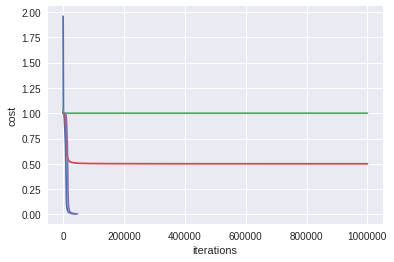

In [8]:
def getCost(h,y):
    return np.sum( (h-y)**2 )

class Perceptron(object):
    def __init__(self,alpha=0.01,iters=50,N_h=2,weight1=[-1],weight2=[-1]):
        self.alpha=alpha
        self.iters=iters
        self.N_h=N_h
        self.weight1=weight1
        self.weight2=weight2
    
    def train(self,x,y,costThr=0,facW1=1,facW2=0.1):
        X=x.copy()
        m,n=X.shape
        N_h=self.N_h
        X =np.insert(X,0,1,axis=1) # insert the column of ones

        self.J_hist=[]
        self.weight1 = np.random.randn(n+1,N_h)*facW1 #N+1 x N_h = 3 x 2
        self.weight2 = np.random.randn(N_h+1,1)*facW2 #N_h+1 x 1 = 3 x 1
        for iterNo in range(self.iters):
            # ForwardProp
            X_h = self.getH0(X)
            X_h =np.insert(X_h,0,1,axis=1) # insert the column of ones
            h = self.getH(X_h)
            j=getCost(h,y)
            self.J_hist.append(j)
            if(j<=costThr):
                self.iters=iterNo
        
                break;
            
            """ BackProp - grad in Left to right order """
            # deltaLayer2 is 4 x 3
            # weight2 is 3x1
            # X_h is 4x3 with the bias
            deltaLayer2 = np.multiply( np.subtract(h,y) ,np.multiply(h,1-h))
            #inputs are coeffs -
            deltaW2 = np.matmul(X_h.T, deltaLayer2)  # shud be of dim of W2
            #weights are coeffs -#out(1-out) -
            deltaLayer1 = np.multiply( np.matmul(deltaLayer2,self.weight2.T) ,np.multiply(X_h,1-X_h))
            #remove the bias column #inputs are coeffs -
            deltaW1 = np.matmul(X.T ,np.delete(deltaLayer1,[0],axis=1))
            #update at the end of iter
            self.weight2= self.weight2 - (self.alpha/m) * deltaW2
            self.weight1= self.weight1 - (self.alpha/m) * deltaW1
            
 
    def predict(self,x):
        X=x.copy()
        X =np.insert(X,0,1,axis=1) # insert the column
        X_h = self.getH0(X)
        X_h =np.insert(X_h,0,1,axis=1) # insert the column of ones
        h=self.getH(X_h)
        return h# np.array([1 if hi>=0.5 else 0 for hi in h])
    
    def getH0(self,X):
        return  sigmoid(np.matmul(X,self.weight1))
    
    def getH(self,X_h):
        return  sigmoid(np.matmul(X_h,self.weight2))


X= np.array([[0,0],[1,0],[0,1],[1,1],])
y = np.array([ 0,    1,    1,    0,]).reshape((4,1))
"""
# XOR -
 facW1 facW2 iterations 
    1     1      64513
    0.01  1      354205
    1    0.1     40904
    1    0.01    44850
 
"""
for a,b in [[1,1],[0.01,1],[1,0.1],[1,0.01]]:
    pp = Perceptron(alpha=0.15,iters=1000000)
    pp.train(X,y,costThr=0.005,facW1=a,facW2=b)
# print(pp.weight1,pp.weight2)
    if(len(pp.J_hist)==0):
        print('err')
        continue
    plt.plot(pp.J_hist)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    
    print('cost',pp.J_hist[-1],'iterations',pp.iters)
# X=np.random.permutation(X)
    p=pp.predict(X).reshape((4,1))
    print(np.concatenate( [X,p],axis=1))

